11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8134 - loss: 0.6264 - val_accuracy: 0.9538 - val_loss: 0.1537
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9603 - loss: 0.1317 - val_accuracy: 0.9636 - val_loss: 0.1238
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9722 - loss: 0.0914 - val_accuracy: 0.9668 - val_loss: 0.1118
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9784 - loss: 0.0714 - val_accuracy: 0.9684 - val_loss: 0.1113
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9834 - loss: 0.0518 - val_accuracy: 0.9734 - val_loss: 0.0901
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9712 - val_loss: 0.1018
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9891 - loss: 0.0324 - val_accuracy: 0.9739 - val_loss: 0.0986
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.

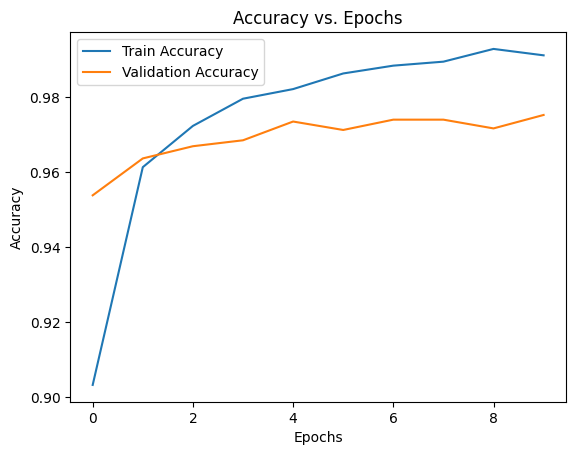

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.1064
Test Accuracy: 97.46%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


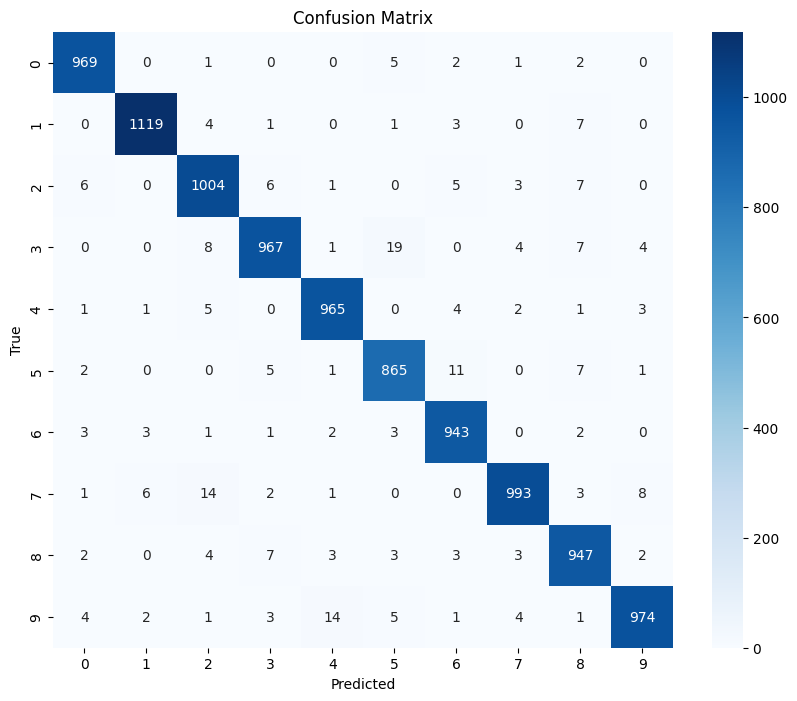

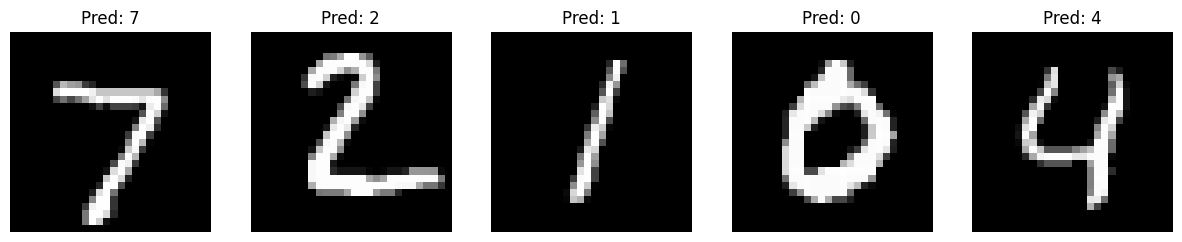

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images from 28x28 to 784-dimensional vectors
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode the labels for classification
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the MLP model
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Plot accuracy vs. epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Get predictions and generate confusion matrix
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot sample predictions
num_samples = 5
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    ax = axes[i]
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred_labels[i]}")
    ax.axis('off')

plt.show()


In [ ]:
import os

# Define the path to your folder containing the images
folder_path = 'C:/Users/Lab/Downloads/animals/dog'  # Update this path with your actual folder path

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Filter only .jpg files (ignoring others)
jpg_files = [f for f in files if f.lower().endswith('.jpeg')]

# Sort the files (optional: to ensure consistent ordering, like alphabetical)
jpg_files.sort()

# Rename the files sequentially (dog1.jpg, dog2.jpg, etc.)
for idx, old_filename in enumerate(jpg_files, 1):
    old_file_path = os.path.join(folder_path, old_filename)

    # Create new filename with dog1.jpg, dog2.jpg, ...
    new_filename = f'dog{idx}.jpeg'
    new_file_path = os.path.join(folder_path, new_filename)

    # Rename the file
    os.rename(old_file_path, new_file_path)
    print(f'Renamed "{old_filename}" to "{new_filename}"')

print("Renaming completed.")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Lab/Downloads/animals/dog'

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os

# Define the path to your dataset folder (update this path with your actual dataset folder)
data_path = 'C:/Users/Lab/Downloads/animals'  # Update this path with your actual dataset folder

# Categories: Dog, Horse, Cat (you can expand this list if needed)
categories = ['dog', 'horse', 'cat']

# Initialize image data and labels
images = []
labels = []

# Loop through the directories of each category and load images
for label, category in enumerate(categories):
    category_path = os.path.join(data_path, category)

    # Ensure the category path exists
    if not os.path.exists(category_path):
        print(f"Path for category '{category}' does not exist. Skipping...")
        continue

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        # Check if the file is an image (you can filter by extensions if needed)
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            continue

        try:
            # Load image, resize to 64x64, and convert to numpy array
            img = image.load_img(img_path, target_size=(64, 64))
            img_array = image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values to range [0, 1]
images = images / 255.0

# One-hot encode labels
labels = to_categorical(labels, num_classes=len(categories))

# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create the MLP model
model = Sequential()

# Flatten the 64x64x3 input images into 1D vectors (12,288 features)
model.add(Flatten(input_shape=(64, 64, 3)))

# Add hidden layers with ReLU activation
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer with softmax activation (3 classes)
model.add(Dense(len(categories), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Make predictions on test data
y_pred = model.predict(x_test)

# Get the predicted class labels (index of maximum probability)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Visualize sample predictions
num_samples = 5
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i in range(num_samples):
    ax = axes[i]
    ax.imshow(x_test[i])
    ax.set_title(f"Pred: {categories[y_pred_labels[i]]}\nTrue: {categories[y_test_labels[i]]}")
    ax.axis('off')

plt.show()


Path for category 'dog' does not exist. Skipping...
Path for category 'horse' does not exist. Skipping...
Path for category 'cat' does not exist. Skipping...


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.